# Clustering

### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics

### Preprocessing

#### First, I read the dataset using the read_csv function of the pandas library and use it as dataframe.

In [2]:
df = pd.read_csv('data.csv', sep=';')
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


#### I'm checking for null values in the dataset.

In [3]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
dtype: int64

#### I fill them with mean

In [4]:
df = df.fillna(df.mean())

#### I'm looking at the general properties of the dataset

In [5]:
df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.133943,15.740902,33.400979,7.882119,4.601217,33.195188,7.811559,2.588326,14.515652,31.355195,176.457706,32.546223,7.468450,4.903148,8.930792,6.152166,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.250000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,364.000000,174.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.750000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


#### Using the boxplot chart, I can easily see the general ranges of all the values in the data set, and in general, I can see the presence of noises with this chart.

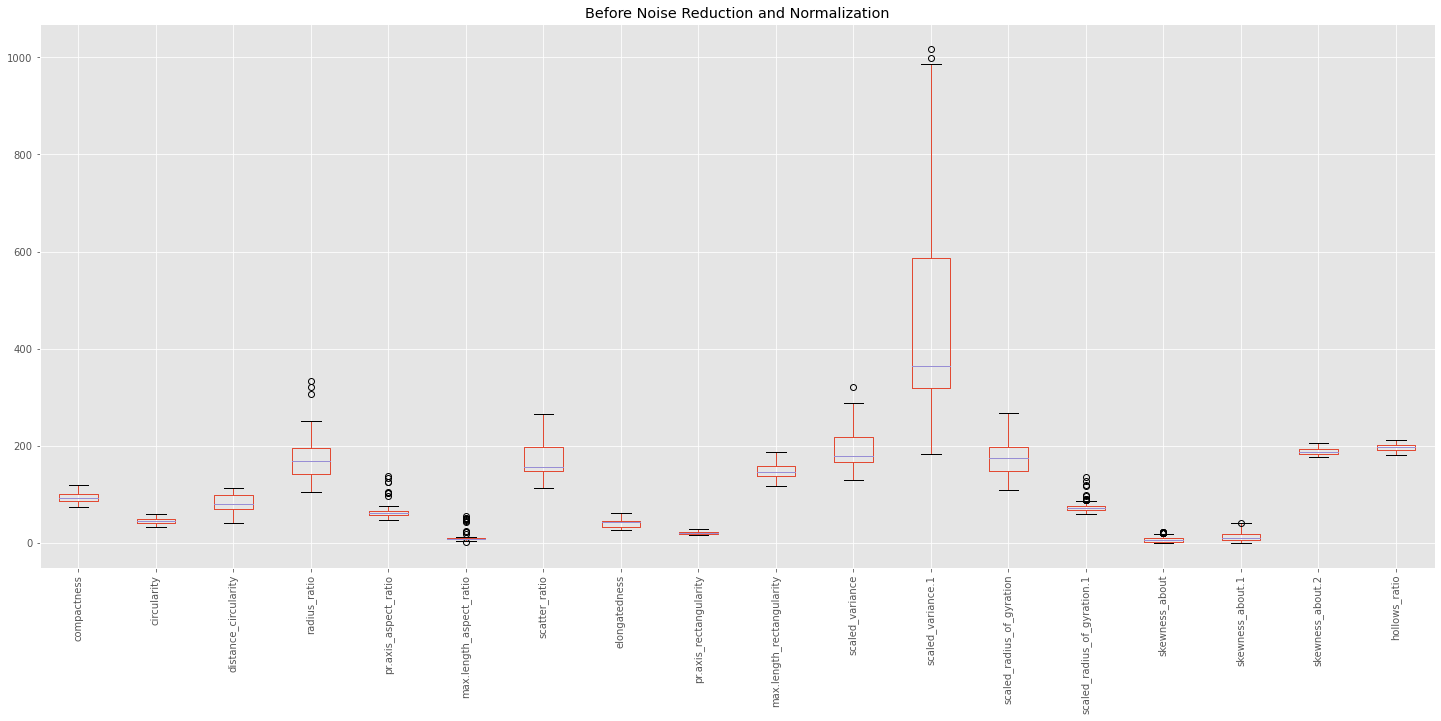

In [6]:
df.boxplot(figsize=(25,10), rot=90)
plt.title('Before Noise Reduction and Normalization')
plt.show()

#### I print all the values of the features with scatter plot in order to see the noises in detail.

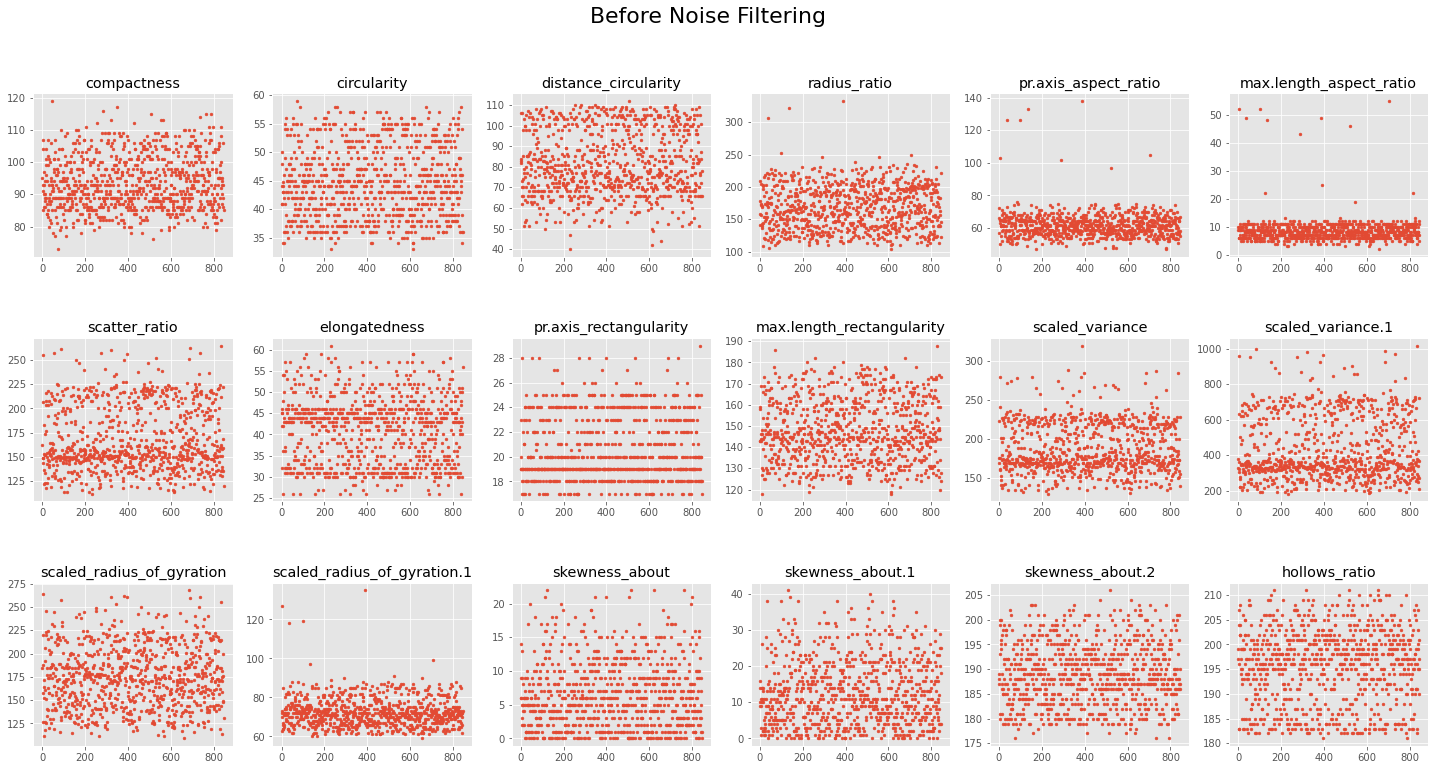

In [7]:
column_names = df.columns

fig, ax = plt.subplots(3,6, figsize=(25, 12))

ax = ax.flatten()

for i, column_name in enumerate(column_names):
    ax[i].scatter(df.index, df[column_name], s=8)
    ax[i].set_title(column_name)

plt.subplots_adjust(hspace=0.5)
plt.suptitle('Before Noise Filtering', fontsize=22)
plt.show()

#### With the help of the graph above, we can clearly see how the noises in the radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_radius_of_gyration features affect the graph.

#### I use IQR Technique for Noise Filtering

In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df = df_out

#### After removing the noise with the IQR technique, we can observe that the data is much more evenly distributed.

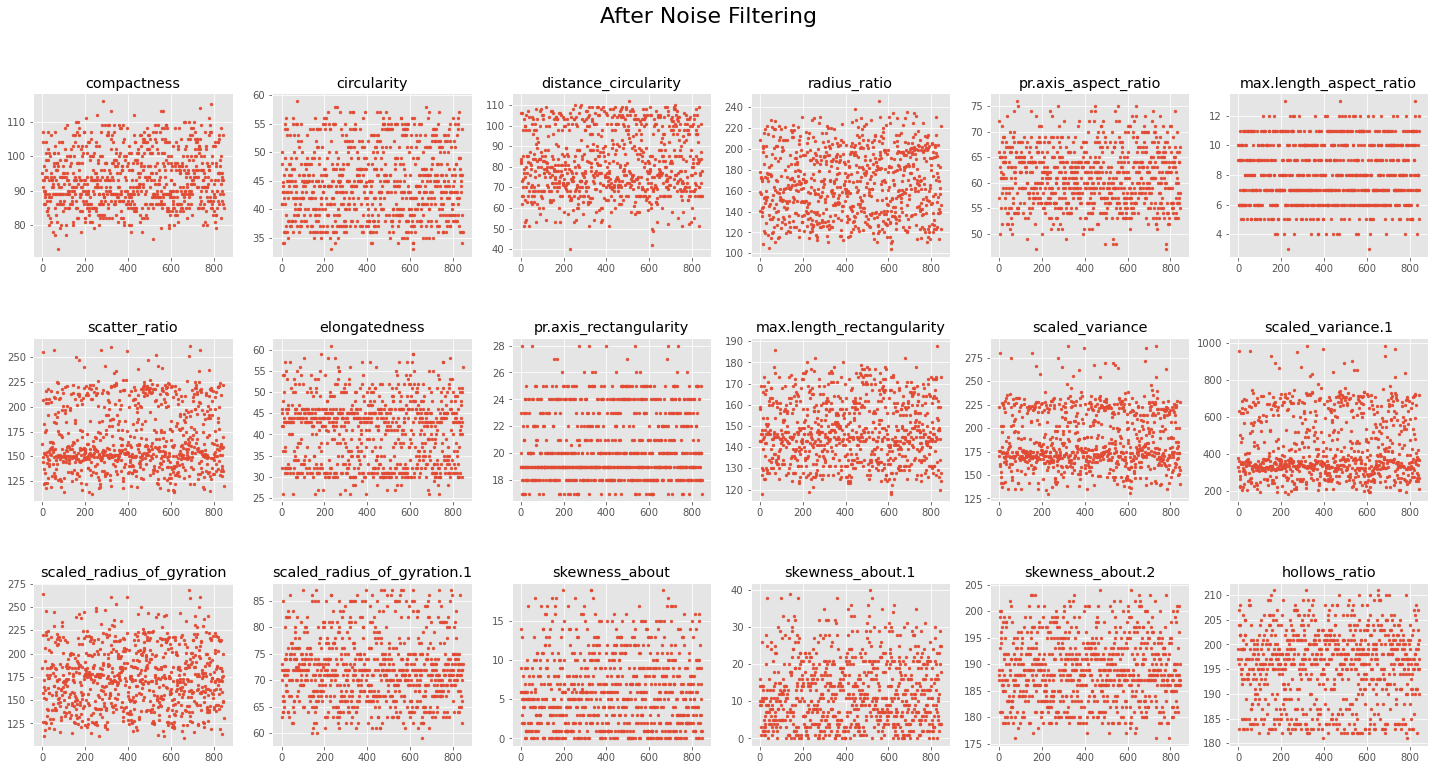

In [9]:
column_names = df.columns

fig, ax = plt.subplots(3,6, figsize=(25, 12))

ax = ax.flatten()

for i, column_name in enumerate(column_names):
    ax[i].scatter(df.index, df[column_name], s=8)
    ax[i].set_title(column_name)

plt.subplots_adjust(hspace=0.5)
plt.suptitle('After Noise Filtering', fontsize=22)
plt.show()

## Clustering Algorithms

#### Centroid Methods: These algorithms divide the data into a fixed number of clusters, based on some measure of similarity between the data points. K-means is the most well-known centroid method.

#### Density Methods: These algorithms identify clusters based on the density of data points in the feature space. DBSCAN is a popular density-based clustering algorithm.

#### Connectivity Methods: These algorithms create a tree-like structure (called a dendrogram) to represent the relationships between the data points. Agglomerative Clustering is one of the popular method.

#### I tried 3 different types of clustering algorithms these are K-means, DBSCAN and Agglomerative Clustering. In order to compare these algorithms within themselves, I thought that they all need the same number of clusters, and firstly, I found the optimal k number with the Elbow Method used for K-means.

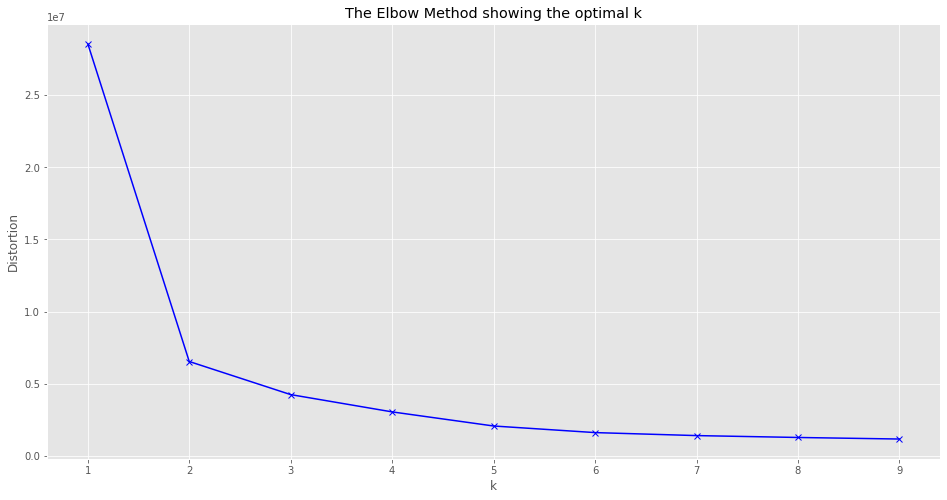

In [10]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### Afterwards, I tried these 3 clustering algorithms by giving the parameter to divide the DBSCAN algorithm into 3 clusters and plot the silhoutte scores.

In [11]:
k_means = KMeans(n_clusters=3)
k_means.fit(df)
k_means.predict(df)
labels = k_means.labels_
km1 = metrics.silhouette_score(df, labels, metric = 'euclidean')

dbscan = DBSCAN(eps=30, min_samples=10)
dbscan.fit_predict(df)
labels = dbscan.labels_
db1 = metrics.silhouette_score(df, labels, metric = 'euclidean')

agg = AgglomerativeClustering(n_clusters=3)
agg.fit_predict(df)
labels = agg.labels_
agg1 = metrics.silhouette_score(df, labels, metric = 'euclidean')

mean1 = (km1+db1+agg1) / 3

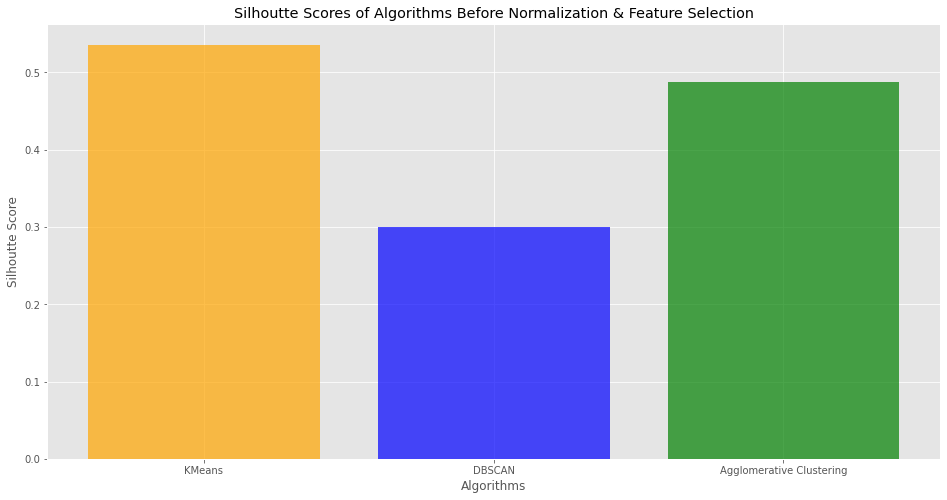

In [12]:
scores = [km1, db1, agg1]
plt.figure(figsize=(16,8))
algo_names = ("KMeans", "DBSCAN", "Agglomerative Clustering")
y = np.arange(len(algo_names))
plt.bar(y,scores, color=['orange', 'blue', 'green'], alpha=0.7)
plt.xticks(y,algo_names)
plt.xlabel('Algorithms')
plt.ylabel('Silhoutte Score')
plt.title("Silhoutte Scores of Algorithms Before Normalization & Feature Selection")
plt.show()

## Normalization and Feature Selection

In [13]:
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

for col in df.columns:
    df[col] = min_max_scaling(df[col])

df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.511628,0.576923,0.597222,0.521127,0.862069,0.7,0.333333,0.457143,0.272727,0.585714,0.291139,0.242839,0.471698,0.392857,0.315789,0.400,0.392857,0.533333
1,0.418605,0.307692,0.611111,0.260563,0.344828,0.6,0.246667,0.542857,0.181818,0.357143,0.253165,0.181818,0.308176,0.464286,0.473684,0.350,0.464286,0.600000
2,0.720930,0.653846,0.916667,0.739437,0.655172,0.7,0.633333,0.171429,0.545455,0.571429,0.588608,0.561644,0.698113,0.500000,0.736842,0.225,0.428571,0.500000
3,0.465116,0.307692,0.583333,0.387324,0.551724,0.6,0.213333,0.571429,0.181818,0.357143,0.189873,0.155666,0.113208,0.142857,0.315789,0.250,0.821429,0.866667
5,0.790698,0.454953,0.916667,0.478873,0.103448,0.3,0.953333,0.000000,1.000000,0.728571,0.949367,0.962640,0.974843,0.928571,0.263158,0.225,0.178571,0.066667


#### After performing Noise Reduction and Normalization, I plotted the boxplots again.

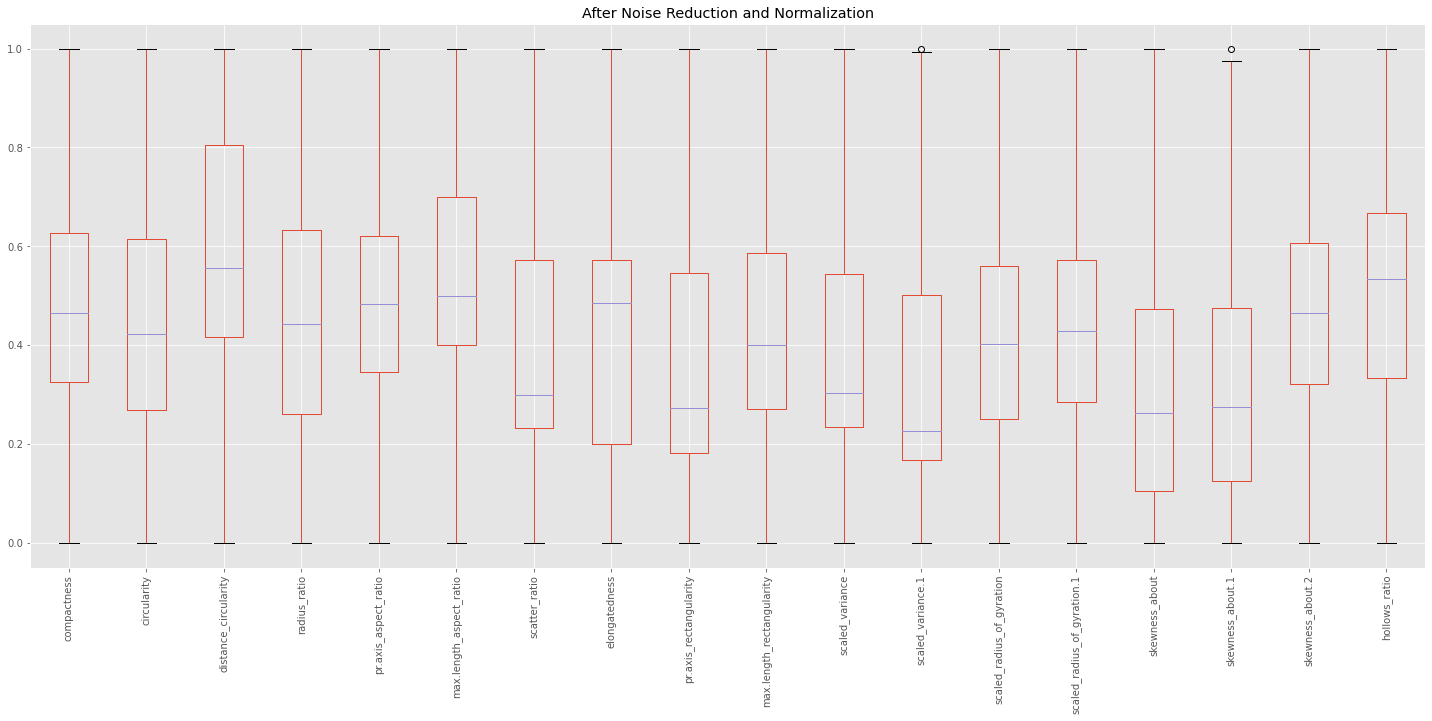

In [14]:
df.boxplot(figsize=(25,10), rot=90)
plt.title('After Noise Reduction and Normalization')
plt.show()

#### It is generally a good idea to remove highly correlated or redundant features from your data before building a model, as they can decrease the performance of the model and increase the risk of overfitting. 

#### I use Pearson Correlation for feature selection

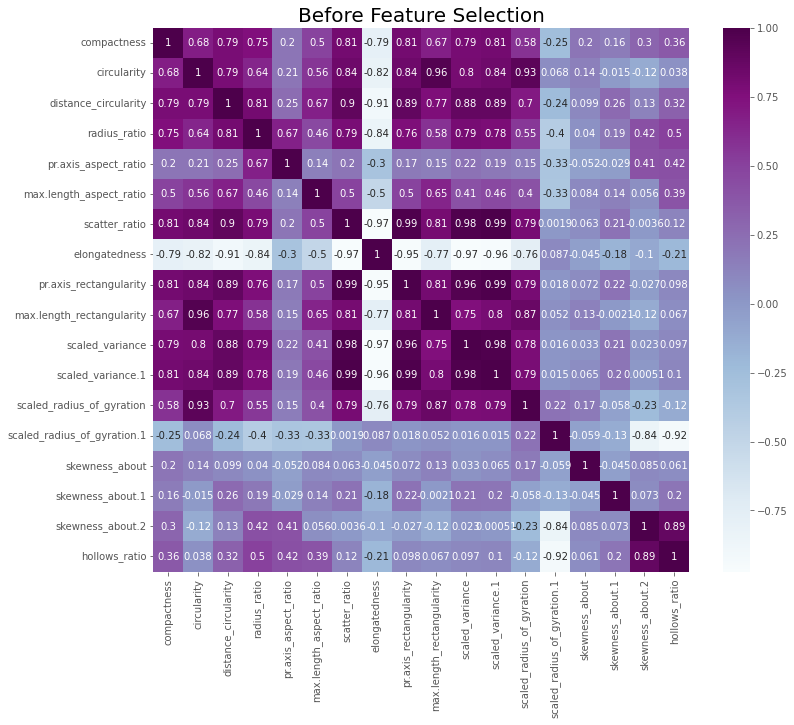

In [15]:
fig, ax = plt.subplots(figsize=(12,10))  
sns.heatmap(df.corr(),annot=True,cmap="BuPu")
plt.title('Before Feature Selection', fontsize =20)
plt.show()

#### Then drop 5 columns after feature selection

In [16]:
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print('Dropped Columns')
print(to_drop)

Dropped Columns
['elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1']


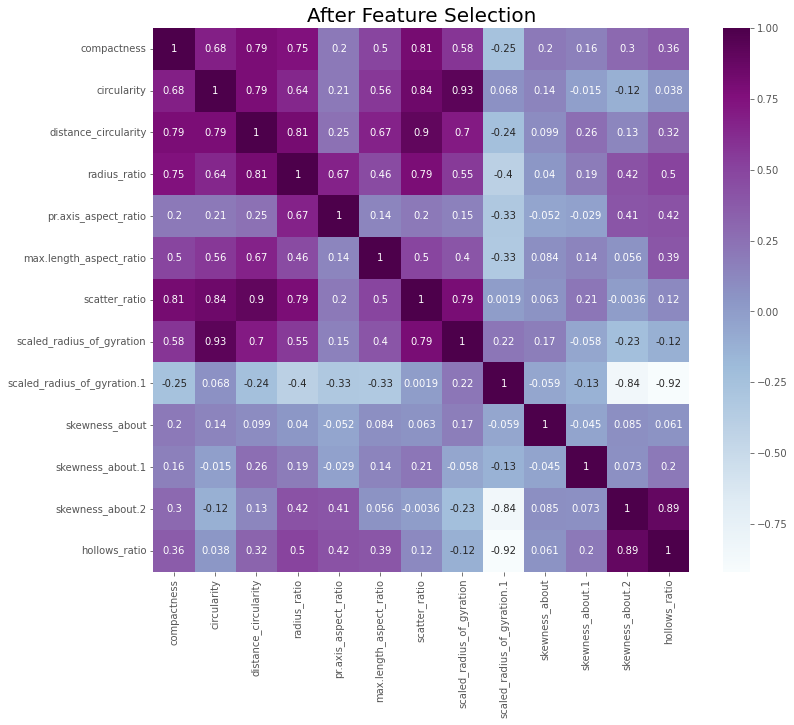

In [17]:
df = df.drop(df[to_drop], axis=1)
fig, ax = plt.subplots(figsize=(12,10))  
sns.heatmap(df.corr(),annot=True,cmap="BuPu")
plt.title('After Feature Selection', fontsize =20)
plt.show()

## Clustering Algorithms After Normalization and Feature Selection

In [18]:
k_means = KMeans(n_clusters=3)
k_means.fit(df)
k_means.predict(df)
labels = k_means.labels_
km2 = metrics.silhouette_score(df, labels, metric = 'euclidean')

dbscan = DBSCAN(eps=0.4, min_samples=10)
dbscan.fit_predict(df)
labels = dbscan.labels_
db2 = metrics.silhouette_score(df, labels, metric = 'euclidean')

agg = AgglomerativeClustering(n_clusters=3)
agg.fit_predict(df)
labels = agg.labels_
agg2 = metrics.silhouette_score(df, labels, metric = 'euclidean')

mean2 = (km2+db2+agg2)/3

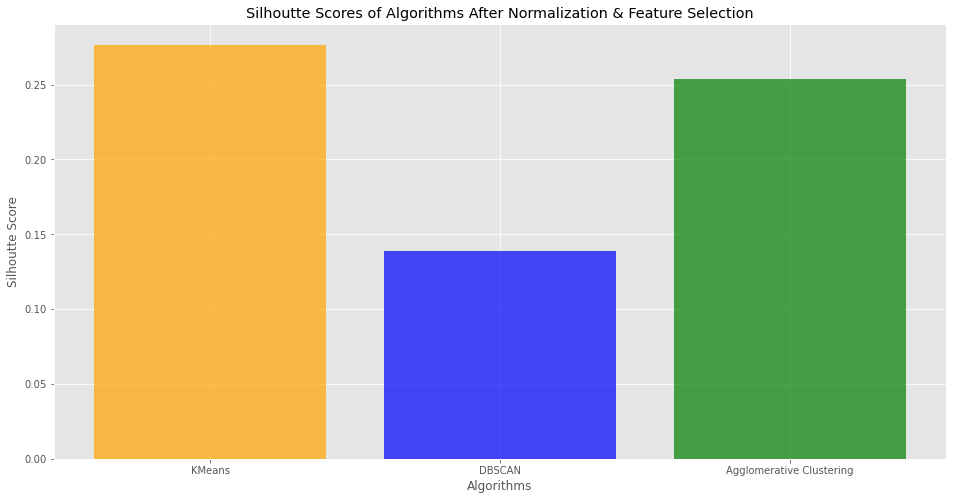

In [19]:
scores = [km2, db2, agg2]
plt.figure(figsize=(16,8))
algo_names = ("KMeans", "DBSCAN", "Agglomerative Clustering")
y = np.arange(len(algo_names))
plt.bar(y,scores, color=['orange', 'blue', 'green'], alpha=0.7)
plt.xticks(y,algo_names)
plt.xlabel('Algorithms')
plt.ylabel('Silhoutte Score')
plt.title("Silhoutte Scores of Algorithms After Normalization & Feature Selection")
plt.show()

### Comparing the Performance of Clustering Algorithms 

#### Finally, I plotted the average of the 3 clustering algorithms I used before performing Normalization and Feature Selection, and the average after performing Normalization and Feature Selection

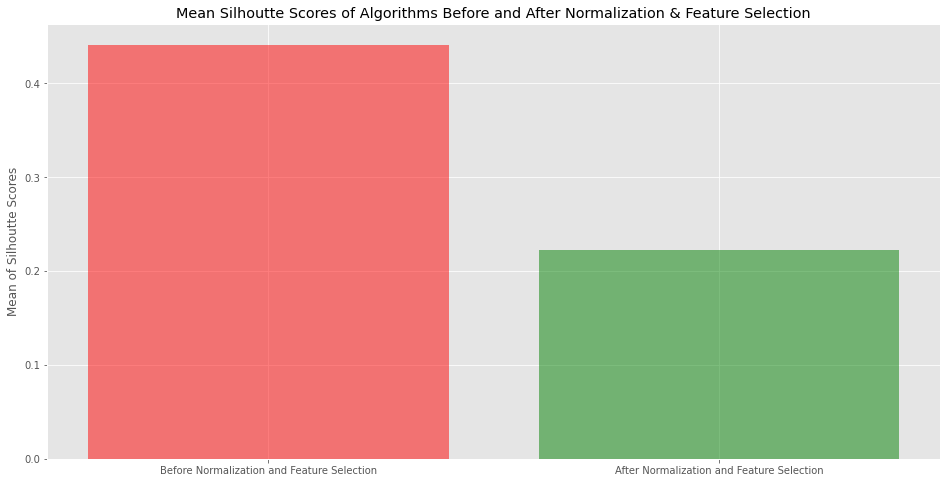

In [20]:
scores = [mean1, mean2]
plt.figure(figsize=(16,8))
names = ("Before Normalization and Feature Selection", "After Normalization and Feature Selection")
y = np.arange(len(names))
plt.bar(y,scores, color=['red','green'], alpha=0.5)
plt.xticks(y, names)
plt.ylabel('Mean of Silhoutte Scores')
plt.title("Mean Silhoutte Scores of Algorithms Before and After Normalization & Feature Selection")
plt.show()

## Conclusion

#### The silhouette score is a measure of the quality of a clustering, with values ranging from -1 to 1. A high silhouette score indicates that the data points in a cluster are similar to each other and are well separated from data points in other clusters. A low silhouette score indicates that the data points in a cluster are not well separated from data points in other clusters.

#### According to the results above, the silhouette score looks better before normalization vs feature selection.
### but it is not possible to say that clustering without normalization and feature selection is more successful.

#### It is little chance that the silhouette score may be better before normalization and feature selection if the data is already in a suitable format for clustering and the normalization and feature selection process actually degrades the quality of the clustering. 

#### However, it is more likely that the data is not in a suitable format for clustering before normalization and feature selection, and the silhouette score may not be meaningful in this case. It is important to ensure that the data is in a suitable format for clustering before evaluating the quality of the clustering.

#### Before performing normalization and feature selection, the silhouette score may not be meaningful if the data is not in a suitable format for clustering. For example, if the data has very different scales for different features, or if it has a large number of irrelevant features, the silhouette score may be low even if the data has natural clusters.

#### After performing normalization and feature selection, the silhouette score may improve if the data is now in a more suitable format for clustering. Normalization can help to remove the effect of different scales for different features, and feature selection can help to remove irrelevant features that may be confusing the clustering algorithm. As a result, the clusters may be more distinct and the silhouette score may increase.